In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter



# def histogram(data=[], title="", xlabel="None", ylabel="None",
#                    labels=None, bins=None, width=None, alpha=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     plt.hist(data, rwdith=width, bins=bins, alpha=alpha, label=labels)
#     plt.savefig(title+".pdf")
#     plt.show()

# def line_plot(x=[], y=[], title="", xlabel="None", ylabel="None",
#                    log_xscale=True, ylim=None, labels=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     if log_xscale:
#         plt.xscale('log')

#     if ylim:
#         bottom,top=ylim
#         plt.ylim(bottom=bottom, top=top)

#     if isinstance(y[0],list):
#         for i in range(len(y)):
#             plt.plot(x,y[i],label=labels[i])
#         plt.legend()
#     else:
#         plt.plot(x,y)
#     plt.savefig(title+".pdf")
#     plt.show()

# def scatter_plot(x=[], y=[], z=[] title="", xlabel="None", ylabel="None", zlabel="None",
#                    log_xscale=True, log_yscale=False, ylim=None, labels=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     if log_xscale:
#         plt.xscale('log')

#     if log_yscale:
#         plt.yscale('log')

#     if ylim:
#         bottom,top=ylim
#         plt.ylim(bottom=bottom, top=top)

#     sc=[plt.scatter(x,y,c=z,cmap=cm, s=150)]

#     plt.savefig(title+".pdf")
#     plt.show()

## Line Plot

In [87]:
def line_plot(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/'+fileName+'.csv')
    # print(df)
    
    df['FilterType'] = df['FilterType'].astype(str)
    bloom = df[df['FilterType'] == 'Bloom']
    cuckoo = df[df['FilterType'] == 'Cuckoo']
    xor = df[df['FilterType'] == 'Xor']
    blockedbloom = df[df['FilterType'] == 'Blocked Bloom']
    theory = df[df['FilterType'] == 'Lower Bound']

    if iter:
        bloom = bloom.groupby(x)[y].mean().reset_index()
        cuckoo = cuckoo.groupby(x)[y].mean().reset_index()
        xor = xor.groupby(x)[y].mean().reset_index()
        blockedbloom = blockedbloom.groupby(x)[y].mean().reset_index()
    
    print(df['FilterType'].unique())
    plt.figure()

    if xscale:
        plt.xscale('log')
    
    plt.plot(bloom[x], bloom[y], label='BloomFilter')
    plt.plot(cuckoo[x], cuckoo[y], label='CuckooFilter')
    plt.plot(blockedbloom[x], blockedbloom[y], label='BlockedBloomFilter')
    plt.plot(xor[x], xor[y], label='XORFilter')
    if bound:
        plt.plot(theory[x], theory[y], label='Lower Bound', linestyle = '--')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)
    plt.legend()
    
    plt.savefig("./out/"+ fileName + ".pdf")
    
    plt.show()

['Bloom' 'Cuckoo' 'Xor' 'Lower Bound']


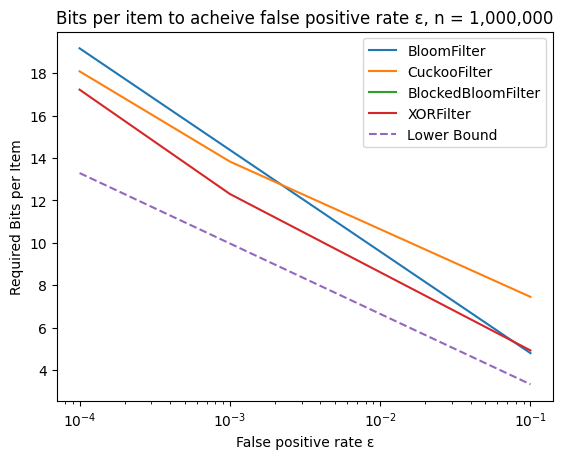

In [88]:
line_plot(fileName="bpi_fpr", x="fpr", y="bpi", figureName='Bits per item to acheive false positive rate ε, n = 1,000,000', 
          xscale=True, xlabel="False positive rate ε", ylabel="Required Bits per Item", bound=True)

# line_plot(fileName="buildTime_n", x="n", y="constTime", figureName='Construction time in terms of number of keys', 
#           xscale=True, xlabel="Number of Keys Inserted", ylabel="Construction time per key (ns)")



        FilterType            n   constTime   fpr  iteration
0            Bloom      10000.0   12.158300  0.01          1
1           Cuckoo      10000.0  104.162500  0.01          1
2    Blocked Bloom      10000.0    3.287500  0.01          1
3              Xor      10000.0  564.541700  0.01          1
4            Bloom      10000.0   10.983300  0.01          2
..             ...          ...         ...   ...        ...
195            Xor  100000000.0   40.188132  0.01          9
196          Bloom  100000000.0    0.455004  0.01         10
197         Cuckoo  100000000.0    0.660474  0.01         10
198  Blocked Bloom  100000000.0    0.023141  0.01         10
199            Xor  100000000.0   37.575580  0.01         10

[200 rows x 5 columns]
['Bloom' 'Cuckoo' 'Blocked Bloom' 'Xor']


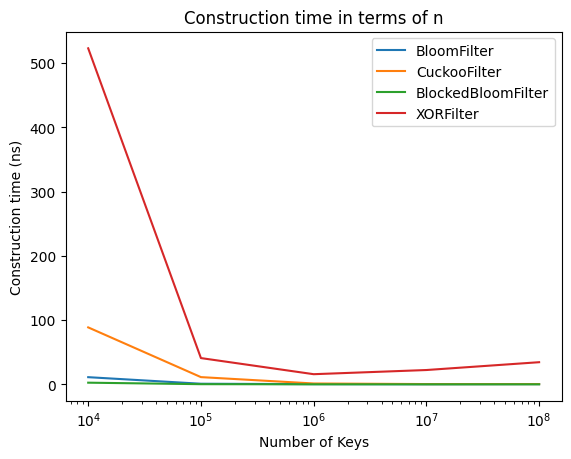

In [61]:
line_plot(fileName="buildTime_n", x="n", y="constTime", figureName='Construction time in terms of n', 
          xscale=True, xlabel="Number of Keys", ylabel="Construction time (ns)", iter=True, bound=False)

## Bar Plot

In [50]:
def bar_plot(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/' + fileName + '.csv')
    
    df['FilterType'] = df['FilterType'].astype(str)
    if iter:
        grouped = df.groupby(['FilterType', x])[y].agg(['mean', 'std', 'count']).reset_index()
        grouped['stderr'] = grouped['std'] / np.sqrt(grouped['count'])
    else:
        grouped = df.copy()
        grouped['stderr'] = 0  # Assuming no error if not iterating

    x_values = df[x].unique()
    x_pos = np.arange(len(x_values))
    width = 0.2

    plt.figure()

    if xscale:
        plt.xscale('log')

    filter_colors = {
        'Bloom': 'red',
        'Cuckoo': 'orange',
        'Blocked Bloom': 'blue',
        'Xor': 'green'
    }
    legend_added = []

    for i, xval in enumerate(x_values):
        for j, ftype in enumerate(['Bloom', 'Cuckoo', 'Blocked Bloom', 'Xor']):
            subset = grouped[(grouped['FilterType'] == ftype) & (grouped[x] == xval)]
            if not subset.empty:
                plt.bar(i - width * 1.5 + j * width, subset['mean'].values[0], width,
                        color=filter_colors[ftype],  # Set color for each filter type
                        yerr=subset['stderr'].values[0], label=ftype if ftype not in legend_added else "", capsize=5)
                if ftype not in legend_added:
                    legend_added.append(ftype)
    plt.xticks(x_pos, labels=np.round(x_values, 2))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)
    plt.legend()
    
    plt.savefig("./out/"+ fileName + ".pdf")
    
    plt.show()

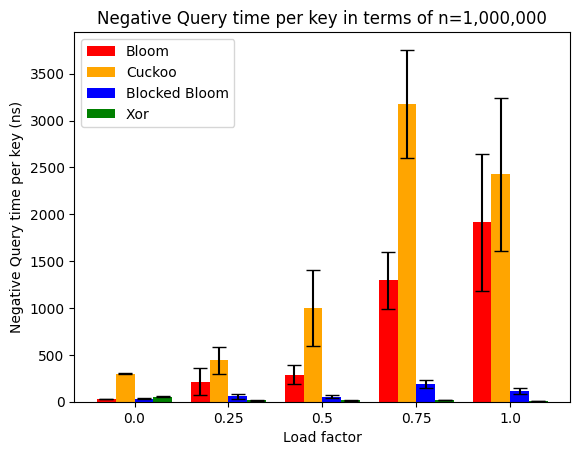

In [72]:
bar_plot(fileName="lf_negQueryTime", x="lf", y="queryTime", figureName='Negative Query time per key in terms of n=1,000,000', 
          xscale=False, xlabel="Load factor", ylabel="Negative Query time per key (ns)", iter=True, bound=False)

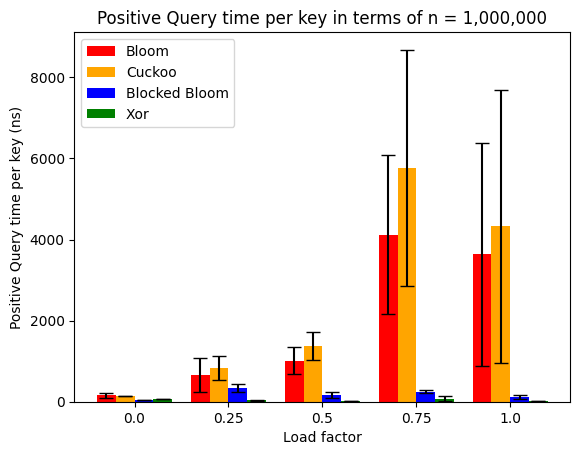

In [73]:
bar_plot(fileName="lf_posQueryTime", x="lf", y="queryTime", figureName='Positive Query time per key in terms of n = 1,000,000', 
          xscale=False, xlabel="Load factor", ylabel="Positive Query time per key (ns)", iter=True, bound=False)

## Bar plot without labeled x

In [85]:
def bar_plot_no_x(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/' + fileName + '.csv')
    
    # Check if we need to aggregate data and calculate errors
    if iter:
        # Compute mean and standard error if there are multiple observations
        grouped = df.groupby('FilterType').agg(
            mean=(y, 'mean'),
            stderr=(y, 'std')
        )
        # Standard Error of the Mean (SEM)
        grouped['stderr'] = grouped['stderr'] / np.sqrt(df.groupby('FilterType').size())
    else:
        # If no iteration over multiple datasets, just use the data as is
        grouped = df.copy()
        grouped.rename(columns={y: 'mean'}, inplace=True)
        grouped['stderr'] = 0  # No error bars if there's no iteration

    # Set the colors for each filter type
    filter_colors = {
        'Bloom': 'red',
        'Cuckoo': 'orange',
        'Blocked Bloom': 'blue',
        'Xor': 'green'
    }

    plt.figure(figsize=(10, 6))
    x_pos = np.arange(len(grouped))

    # Create a bar chart
    bars = plt.bar(x_pos, grouped['mean'], yerr=grouped['stderr'], color=[filter_colors[ftype] for ftype in grouped.index], capsize=5)

    # Adding labels for each bar
    plt.xticks(x_pos, grouped.index, rotation=45)

    # Set scales and labels
    if xscale:
        plt.xscale('log')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)

    # Optional horizontal reference line
    if bound:
        plt.axhline(y=0.01, color='gray', linestyle='--', label='Target False Positive, ε = 0.01')
        
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    plt.savefig("./out/"+ fileName + ".pdf")

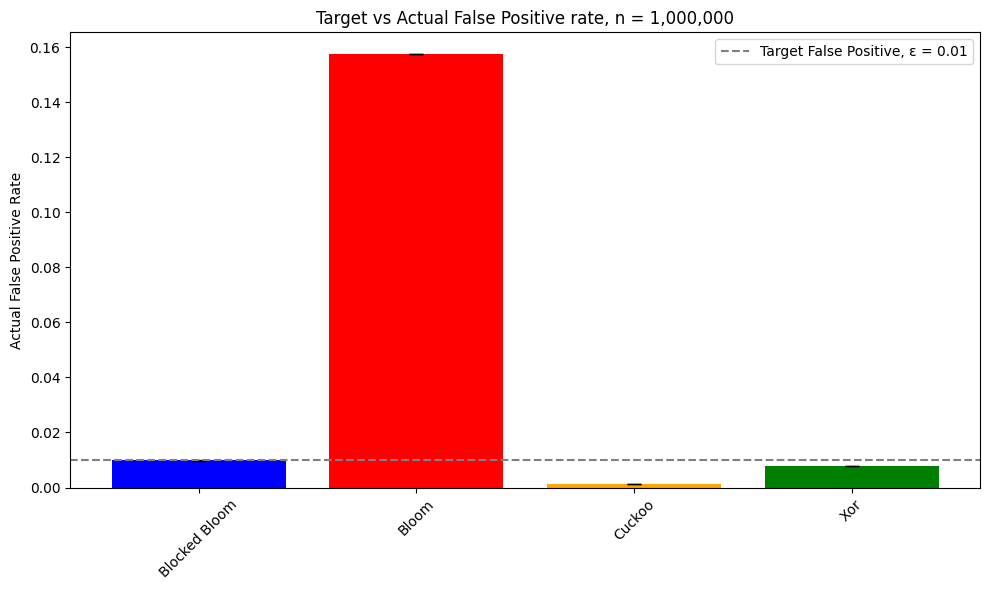

<Figure size 640x480 with 0 Axes>

In [86]:
bar_plot_no_x(fileName="target_actual_fpr", x="target", y="actual", figureName='Target vs Actual False Positive rate, n = 1,000,000', 
          xscale=False, xlabel="", ylabel="Actual False Positive Rate", iter=True, bound=True)